<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/EURUSD/EURUSD_IN2_LSTM_GRID_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=b9886eb6e65a5ac063ce004b1b4e07623522fb5e5c31839d8ec42d23eec06f25
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('EURUSD=X.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-05,1.128605,1.128796,1.120825,1.128579,1.128579,0
1,2019-07-08,1.122788,1.123722,1.120838,1.122738,1.122738,0
2,2019-07-09,1.121479,1.122208,1.119532,1.121604,1.121604,0
3,2019-07-10,1.120461,1.126300,1.120260,1.120825,1.120825,0
4,2019-07-11,1.126126,1.128796,1.125176,1.125885,1.125885,0
...,...,...,...,...,...,...,...
1301,2024-07-01,1.073526,1.077819,1.072076,1.073526,1.073526,0
1302,2024-07-02,1.073710,1.074610,1.071065,1.073710,1.073710,0
1303,2024-07-03,1.074841,1.081560,1.073710,1.074841,1.074841,0
1304,2024-07-04,1.079331,1.081666,1.078423,1.079331,1.079331,0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

# data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
# data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date      Open      High       Low     Close  Adj Close  Volume  \
0  2019-07-05  1.128605  1.128796  1.120825  1.128579   1.128579       0   
1  2019-07-08  1.122788  1.123722  1.120838  1.122738   1.122738       0   
2  2019-07-09  1.121479  1.122208  1.119532  1.121604   1.121604       0   
3  2019-07-10  1.120461  1.126300  1.120260  1.120825   1.120825       0   
4  2019-07-11  1.126126  1.128796  1.125176  1.125885   1.125885       0   
5  2019-07-12  1.125024  1.127800  1.123974  1.125239   1.125239       0   
6  2019-07-15  1.127180  1.128599  1.125568  1.127205   1.127205       0   
7  2019-07-16  1.126088  1.126634  1.120900  1.126177   1.126177       0   
8  2019-07-17  1.121328  1.123343  1.120109  1.121227   1.121227       0   
9  2019-07-18  1.122776  1.124733  1.120624  1.122965   1.122965       0   

        T-4       T-3       T-2       T-1        T0   EMA_5_C        RSI  \
0  1.128579  1.122738  1.121604  1.120825  1.125885  1.123926  28.600071   
1  1.122738

In [ ]:
#MACD calculation
# Calculate the 12-period EMA
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD Line
data['MACD_Line'] = data['EMA_12'] - data['EMA_26']

# Calculate the Signal Line (9-period EMA of the MACD Line)
data['Signal_Line'] = data['MACD_Line'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']

In [ ]:
#ROC Calculations

# Calculate the 2 day ROC
data['ROC2'] = ((data['Close'] - data['Close'].shift(2)) / data['Close'].shift(2)) * 100

# Calculate the 4 day ROC
data['ROC4'] = ((data['Close'] - data['Close'].shift(4)) / data['Close'].shift(4)) * 100

# Calculate the 10 day ROC
data['ROC10'] = ((data['Close'] - data['Close'].shift(10)) / data['Close'].shift(10)) * 100

In [ ]:
print(data.tail(10))

            Date      Open      High       Low     Close  Adj Close  Volume  \
1296  2024-06-24  1.068776  1.074703  1.068444  1.068776   1.068776       0   
1297  2024-06-25  1.073272  1.074576  1.069221  1.073272   1.073272       0   
1298  2024-06-26  1.070962  1.072041  1.066769  1.070962   1.070962       0   
1299  2024-06-27  1.068011  1.072616  1.067783  1.068011   1.068011       0   
1300  2024-06-28  1.070847  1.072099  1.068604  1.070847   1.070847       0   
1301  2024-07-01  1.073526  1.077819  1.072076  1.073526   1.073526       0   
1302  2024-07-02  1.073710  1.074610  1.071065  1.073710   1.073710       0   
1303  2024-07-03  1.074841  1.081560  1.073710  1.074841   1.074841       0   
1304  2024-07-04  1.079331  1.081666  1.078423  1.079331   1.079331       0   
1305  2024-07-05  1.081432  1.084363  1.081198  1.083306   1.083306       0   

           T-4       T-3       T-2  ...  RSI       T_F    EMA_12    EMA_26  \
1296  1.068776  1.073272  1.070962  ...  NaN  1.0735

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date      Open      High       Low     Close  Adj Close  Volume  \
1282  2024-06-04  1.090739  1.091822  1.086071  1.090739   1.090739       0   
1283  2024-06-05  1.088187  1.088992  1.086095  1.088187   1.088187       0   
1284  2024-06-06  1.087453  1.089871  1.086366  1.087453   1.087453       0   
1285  2024-06-07  1.089443  1.090180  1.080497  1.089443   1.089443       0   
1286  2024-06-10  1.077888  1.078283  1.073364  1.077888   1.077888       0   
1287  2024-06-11  1.076426  1.077354  1.072110  1.076426   1.076426       0   
1288  2024-06-12  1.074033  1.085175  1.073503  1.074033   1.074033       0   
1289  2024-06-13  1.081315  1.081783  1.075384  1.081315   1.081315       0   
1290  2024-06-14  1.073883  1.074576  1.066815  1.073883   1.073883       0   
1291  2024-06-17  1.070217  1.072616  1.068764  1.070217   1.070217       0   

           T-4       T-3       T-2  ...        RSI       T_F    EMA_12  \
1282  1.090739  1.088187  1.087453  ...  39.051036  1.07

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,EMA_5_C,RSI,MACD_Histogram,ROC2,ROC4,ROC10,T_F
10,2019-07-19,1.126152,1.121831,1.120611,1.115126,1.114243,1.118168,51.192036,-0.000110,0.439251,-0.093417,-0.215049,1.114616
11,2019-07-22,1.121831,1.120611,1.115126,1.114243,1.114616,1.116984,48.847789,-0.000232,-0.100983,-0.385907,-0.080785,1.113214
12,2019-07-23,1.120611,1.115126,1.114243,1.114616,1.113214,1.115727,51.797755,-0.000364,-0.492029,-0.054940,-0.088534,1.114305
13,2019-07-24,1.115126,1.114243,1.114616,1.113214,1.114305,1.115253,53.136967,-0.000768,-0.597684,-0.698063,-0.508465,1.115797
14,2019-07-25,1.114243,1.114616,1.113214,1.114305,1.115797,1.115435,47.198796,-0.001025,-0.568261,-1.057495,-1.034031,1.107175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-11,1.076426,1.074033,1.081315,1.073883,1.070217,1.075348,47.172292,-0.001028,-1.194831,-1.080789,-0.898831,1.074068
1288,2024-06-12,1.074033,1.081315,1.073883,1.070217,1.074068,1.074921,47.410069,-0.001495,-0.357644,-1.234076,-1.027841,1.074229
1289,2024-06-13,1.081315,1.073883,1.070217,1.074068,1.074229,1.074691,48.931625,-0.001262,0.454188,-0.746069,0.104890,1.075153
1290,2024-06-14,1.073883,1.070217,1.074068,1.074229,1.075153,1.074845,54.553191,-0.001537,-0.013966,-0.371560,-0.891337,1.070641


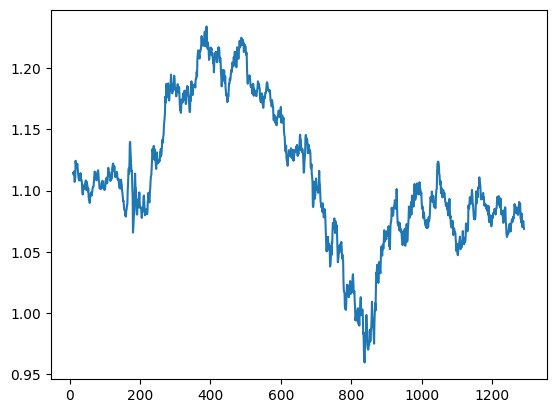

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10',]].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1282,)
(1282, 11, 1)
(1282,)


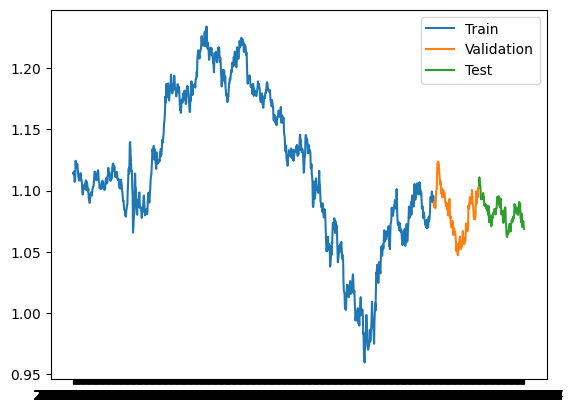

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers

# # model = Sequential([layers.Input((9, 1)),
# #                     layers.LSTM(300),
# #                     layers.Dense(1)])

# model = Sequential([layers.Input((9, 1)),
#                    layers.LSTM(64),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(1)])

# model.compile(loss='mse',
#               optimizer=Adam(learning_rate=0.01),
#               metrics=['mean_absolute_error'])

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define different parameter values to iterate over
epochs_values = [100, 150]
lstm_units_values = [150, 200, 250]
learning_rate_values = [0.01, 0.001, 0.0001]
dense1_values = [50, 100, 150]
dense2_values = [50, 100, 150]

best_loss = float('inf')
best_epochs = None
best_lstm_units = None
best_learning_rate = None
best_dense2 = None
best_dense1 = None
hist = []

# Define X_train, y_train, X_val, y_val

# Loop over different parameter combinations
for epochs in epochs_values:
    for lstm_units in lstm_units_values:
        for learning_rate in learning_rate_values:
          for dense1 in dense1_values:
            for dense2 in dense2_values:
                print(f"Training model with epochs={epochs}, lstm_units={lstm_units}, learning_rate={learning_rate}, dense_unit1={dense1}, dense_unit2={dense2}")

                # model = Sequential([layers.Input((9, 1)),
                #         layers.LSTM(lstm_units),
                #         layers.Dense(1)])

                # Define the model
                model = Sequential([
                    layers.Input((11, 1)),
                    layers.LSTM(lstm_units),
                    layers.Dense(dense1, activation='relu'),
                    layers.Dense(dense2, activation='relu'),
                    layers.Dense(1)
                ])

                model.compile(loss='mse',
                              optimizer=Adam(learning_rate=learning_rate),
                              metrics=['mean_absolute_error'])

                # Train the model
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

                # Check if this combination has the best validation loss so far
                if history.history['loss'][-1] < best_loss:
                    hist = history.history
                    best_loss = history.history['loss'][-1]
                    best_epochs = epochs
                    best_lstm_units = lstm_units
                    best_learning_rate = learning_rate
                    best_dense1 = dense1
                    best_dense2 = dense2

# Print the best combination
print(f"Best combination: epochs={best_epochs}, lstm_units={best_lstm_units}, learning_rate={best_learning_rate}, Validation Loss={best_loss}, best_dense1={best_dense1}, best_dense2={best_dense2}")


Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=50, dense_unit2=50
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=50, dense_unit2=100
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=50, dense_unit2=150
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=100, dense_unit2=50
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=100, dense_unit2=100
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=100, dense_unit2=150
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=150, dense_unit2=50
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=150, dense_unit2=100
Training model with epochs=100, lstm_units=150, learning_rate=0.01, dense_unit1=150, dense_unit2=150
Training model with epochs=100, lstm_units=150, learning_rate=0.001, dense_unit1=50, dense_unit2=

Epoch 1/150
33/33 [==============================] - 3s 19ms/step - loss: 0.1084 - mean_absolute_error: 0.2258 - val_loss: 0.0062 - val_mean_absolute_error: 0.0634
Epoch 2/150
33/33 [==============================] - 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0638 - val_loss: 8.8398e-04 - val_mean_absolute_error: 0.0240
Epoch 3/150
33/33 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0521 - val_loss: 0.0011 - val_mean_absolute_error: 0.0261
Epoch 4/150
33/33 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0492 - val_loss: 6.1730e-04 - val_mean_absolute_error: 0.0205
Epoch 5/150
33/33 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0527 - val_loss: 0.0049 - val_mean_absolute_error: 0.0657
Epoch 6/150
33/33 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0490 - val_loss: 0.0021 - val_mean_absolute_error: 0.0401
Epoch 7/150
3

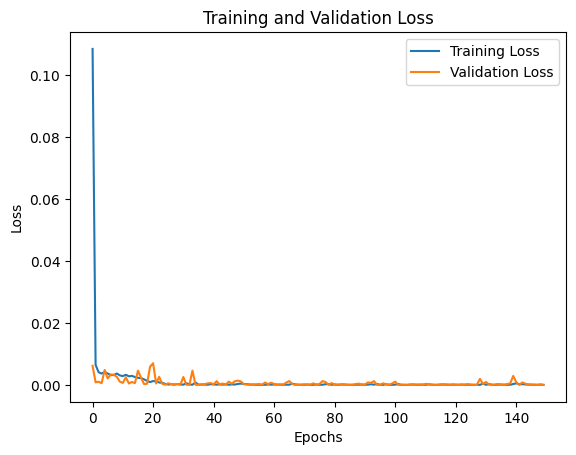

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((11, 1)),
                   layers.LSTM(200),
                   layers.Dense(50, activation='relu'),
                   layers.Dense(50, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 1s 3ms/step


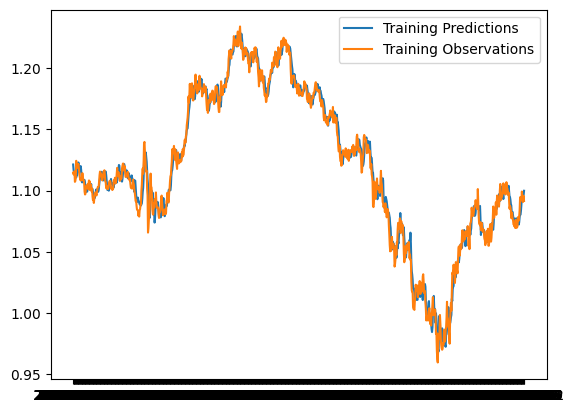

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

59.1700163871952


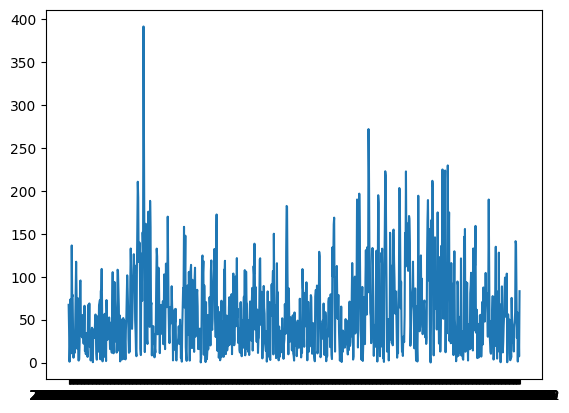

In [ ]:
import numpy as np
basis_point_value=0.0001  #For EURUSD pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

4/4 [==============================] - 0s 4ms/step


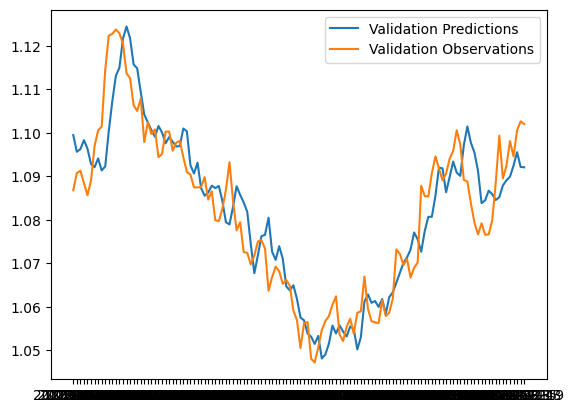

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

59.77478302001968


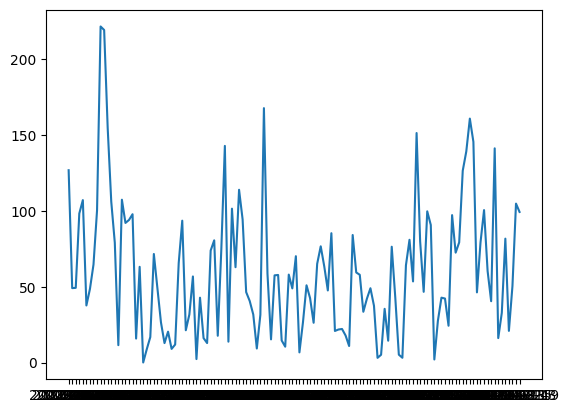

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 3ms/step


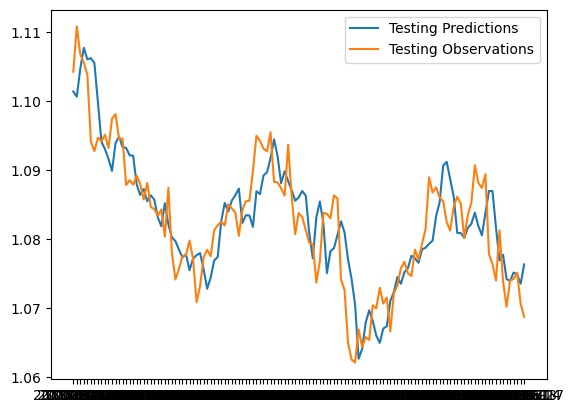

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 2.5836541823153968e-05
Mean Absolute Error: 0.004080019461284302


40.800147165697496


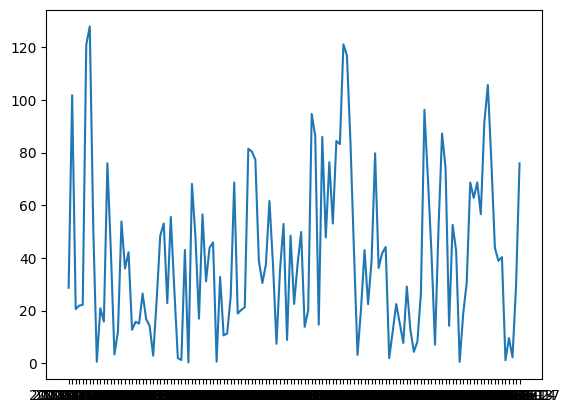

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 USD with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


129
1024.5903244611975
base


In [ ]:
#Start Trading with 1000 USD with actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

129
1160.075508184763
quote


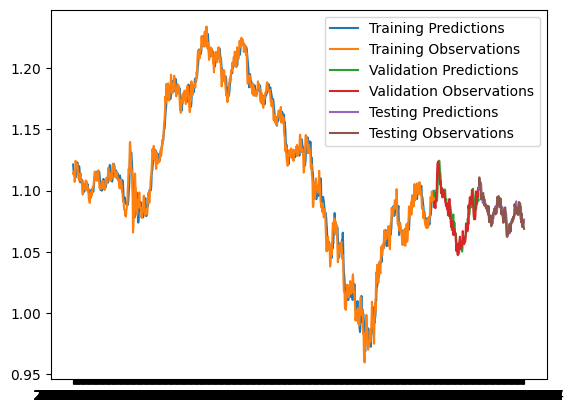

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


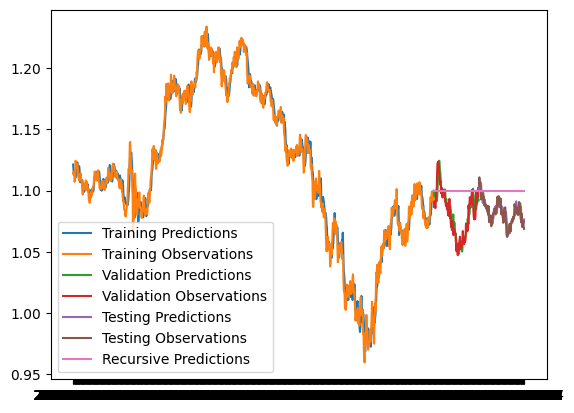

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])